In [26]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [27]:
# Cargar el dataset
data = pd.read_csv('winequality-red.csv')

# Exploración de los datos
print(data.head())
print(data.info())
print(data.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

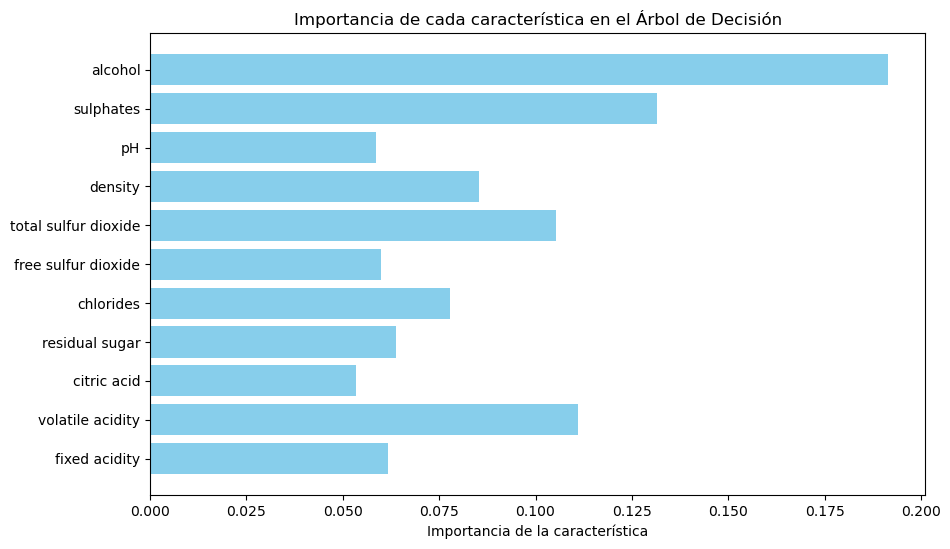

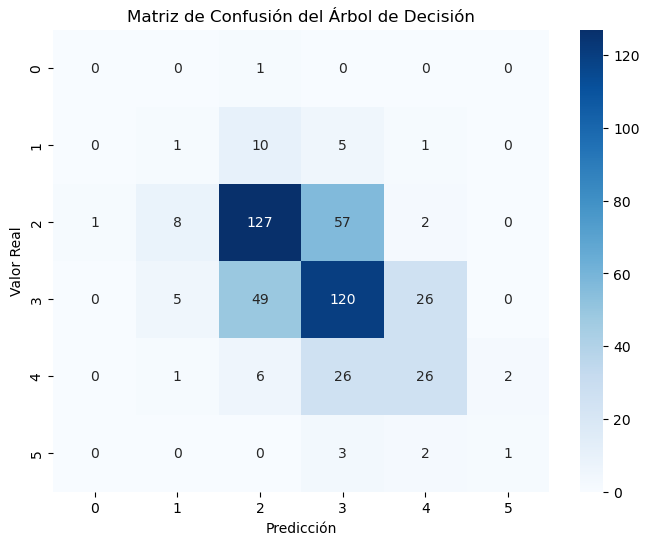

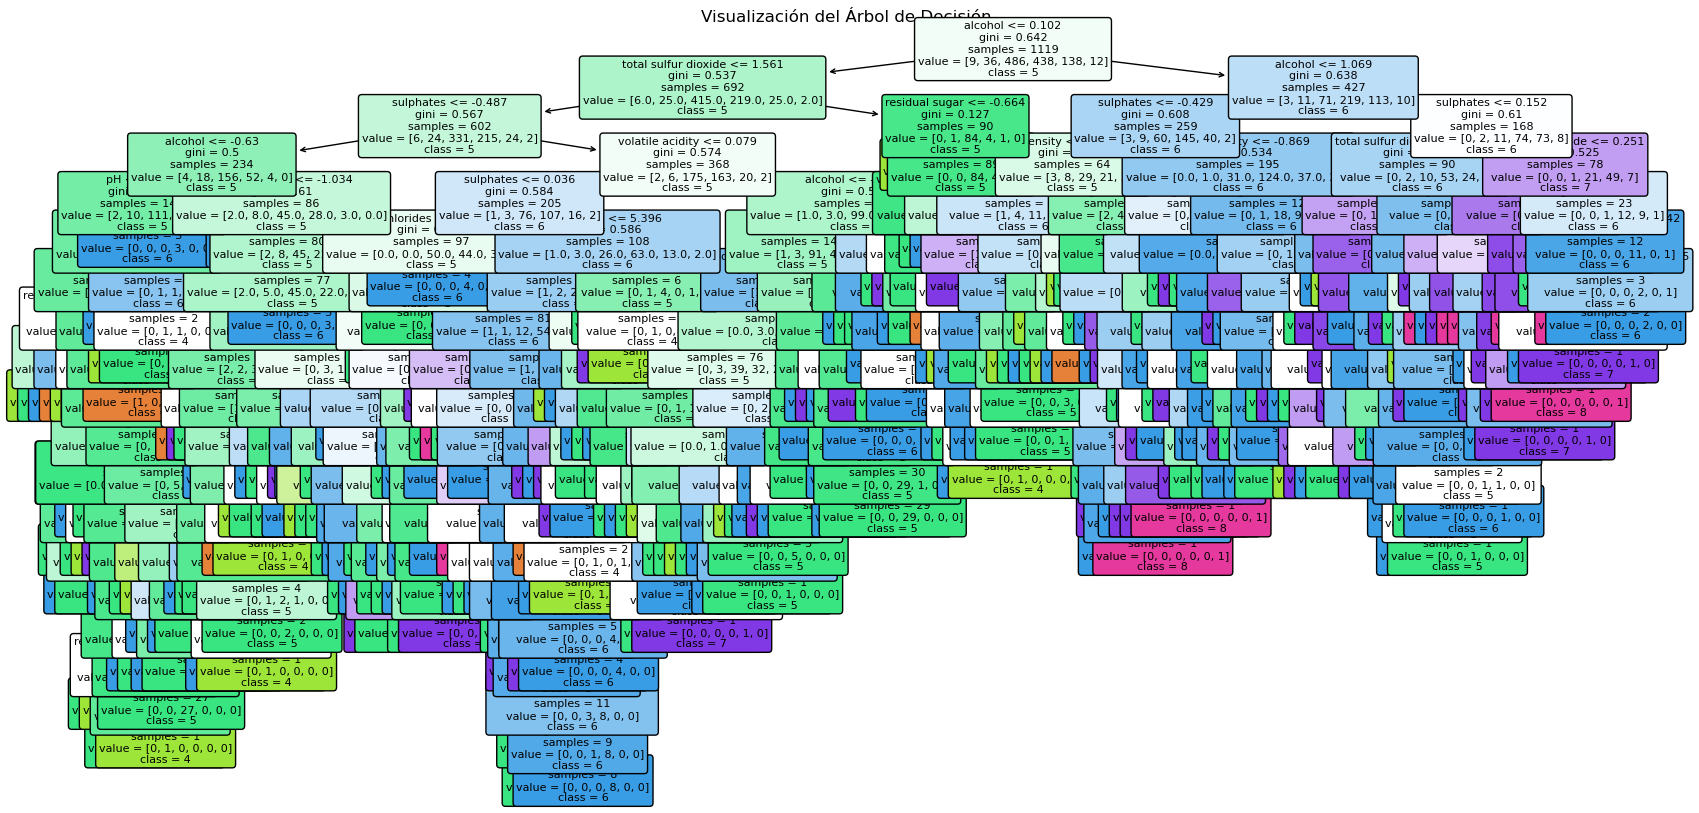

In [30]:
# Importar las librerías necesarias para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Visualización de la importancia de características
feature_importances = model.feature_importances_
features = data.columns[:-1]  # Ajustar según las columnas de características

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Importancia de la característica")
plt.title("Importancia de cada característica en el Árbol de Decisión")
plt.show()


# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión del Árbol de Decisión")
plt.show()

# Visualizar el árbol de decisión (si el árbol no es demasiado grande)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=[str(i) for i in sorted(y.unique())],
          filled=True, rounded=True, fontsize=8)
plt.title("Visualización del Árbol de Decisión")
plt.show()

In [31]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns='quality')  # Ajusta el nombre de la columna objetivo según el archivo
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"Precisión del modelo: {accuracy}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.5729166666666666
Matriz de confusión:
[[  0   0   1   0   0   0]
 [  0   1  10   5   1   0]
 [  1   8 127  57   2   0]
 [  0   5  49 120  26   0]
 [  0   1   6  26  26   2]
 [  0   0   0   3   2   1]]
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.58       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480

